In [1]:
import numpy as np
import pysindy as ps
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# Simple Illustrative System
## Linear 2D ODE
def f(x, t):
    return [-0.1 * x[0] + 2.0 * x[1],
            -2.0 * x[0] - 0.1 * x[1]]

t_train = np.arange(0, 25, 0.01)
x0_train = [2, 0]
x_train = odeint(f, x0_train, t_train)

$$\Large \dot{x} = -0.1x + 2y$$
$$\Large \dot{y} = -2x - 0.1y$$

In [3]:
# Define differentiation, library, and optimizers for SINDy Model
model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=0.05),
    feature_library=ps.PolynomialLibrary(degree=5),
    feature_names=['x', 'y']
)
# Fit and print resulting model
model.fit(x_train, t=t_train, quiet=True)
model.print()

x' = -0.100 x + 2.000 y
y' = -2.000 x + -0.100 y


In [4]:
# Simulate Estimated Model
x_sim = model.simulate(x0_train, t_train)

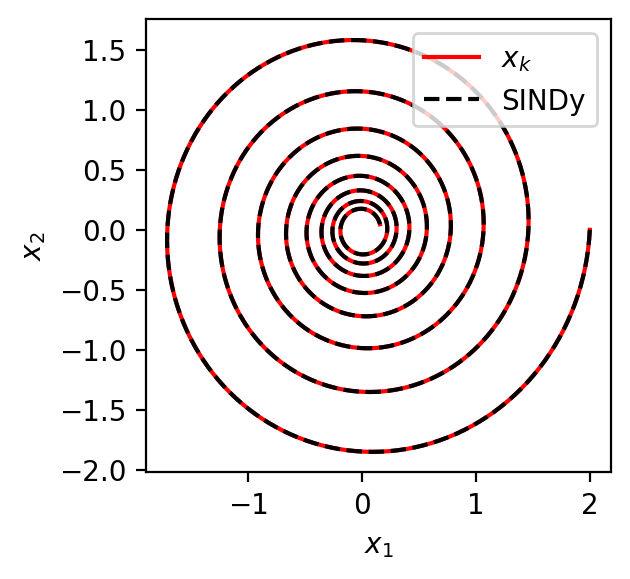

In [5]:
plt.figure(figsize=(3,3), dpi= 200, facecolor='w', edgecolor='k')
plt.plot(x_train[:, 0], x_train[:, 1], 'r', label='$x_k$')
plt.plot(x_sim[:, 0], x_sim[:, 1], 'k--', label='SINDy')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()

In [6]:
# Lorenz System
sigma = 10
rho = 28
beta = 8/3

def lorenz(x, t):
    return [sigma * (x[1] - x[0]),
            x[0] * (rho - x[2]) - x[1],
            x[0] * x[1] - beta * x[2]]

t_train = np.arange(0, 100, 0.001)
x0_train = [-8, 8, 27]  # Initial Condition
x_train = odeint(lorenz, x0_train, t_train)
x_dot_train_measured = np.array([lorenz(x_train[i], 0) for i in range(t_train.size)])

$$\Large
\begin{split}
    \dot{x} & = \sigma(y-x)     \\
    \dot{y} & = x(\rho - z) - y \\
    \dot{z} & = xy-\beta z
\end{split}
$$

In [7]:
# Define differentiation, library, and optimizers for SINDy Model
model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=0.05),
    feature_library=ps.PolynomialLibrary(degree=5),
    feature_names=['x', 'y', 'z']
)
# Fit and print resulting model
model.fit(x_train, x_dot=x_dot_train_measured, t=t_train, quiet=True)
model.print()

x' = -10.000 x + 10.000 y
y' = 28.000 x + -1.000 y + -1.000 x z
z' = -2.667 z + 1.000 x y


In [8]:
# Simulate Estimated Model
t_sim = np.arange(0, 20, 0.001)
x_sim = model.simulate(x_train[0], t_sim)

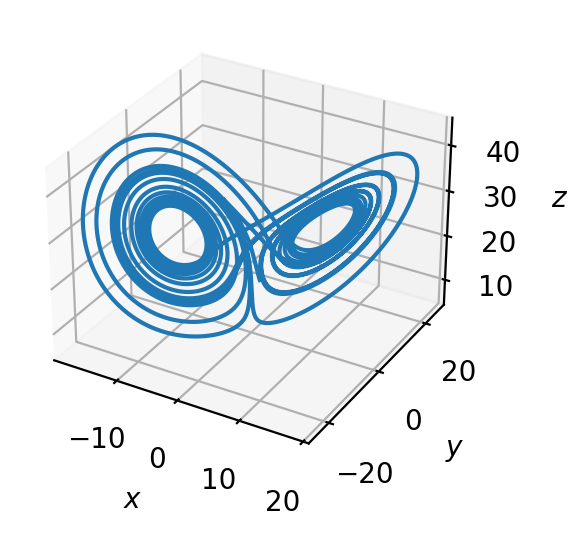

In [9]:
fig = plt.figure(figsize=(3,3), dpi= 200, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.plot(
    x_train[: t_sim.size, 0],
    x_train[: t_sim.size, 1],
    x_train[: t_sim.size, 2],
)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
_ = ax.set_zlabel('$z$') # To supress Notebook-output